# Leader-Follower Futures Analysis

# Problem

We need to investigate possible relationship between three different futures.  

We assume that this relationship takes form of "leader-follower". If it exists, we need to  determine which futures is the leader and which is the follower, and determine its specifics (duration, strength, nature etc.). If it does not exist, we need to prove it.

# Data

Dataset represents closing prices of minute bars (candlesticks) for three continuous futures: 

* E-MINI S&P 500 FUTURES
* FTSE CHINA A50 INDEX FUTURES 
* 10 YEAR TREASURY NOTE FUTURES 

# Analysis

In [4]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('data.csv')
data

,Timestamp,Close Candle,Ticker Full Name
0,2020-01-01 18:01:00,128.312,10 YEAR TREASURY NOTE FUTURES
1,2020-01-01 18:02:00,128.312,10 YEAR TREASURY NOTE FUTURES
2,2020-01-01 18:03:00,128.312,10 YEAR TREASURY NOTE FUTURES
3,2020-01-01 18:04:00,128.312,10 YEAR TREASURY NOTE FUTURES
4,2020-01-01 18:05:00,128.328,10 YEAR TREASURY NOTE FUTURES
...,...,...,...
1756852,2021-11-30 23:55:00,15390.000,FTSE CHINA A50 INDEX FUTURES
1756853,2021-11-30 23:56:00,15390.000,FTSE CHINA A50 INDEX FUTURES
1756854,2021-11-30 23:57:00,15388.000,FTSE CHINA A50 INDEX FUTURES
1756855,2021-11-30 23:58:00,15390.000,FTSE CHINA A50 INDEX FUTURES


Check for NaNs

In [3]:
data.isna().sum()

Timestamp           0
Close Candle        0
Ticker Full Name    0
dtype: int64

Convert time into `timestamp` format

In [4]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.dtypes

Timestamp           datetime64[ns]
Close Candle               float64
Ticker Full Name            object
dtype: object

Check the time range of our data

In [6]:
def minmaxtime(data):
    print("Minimum time: ", data.Timestamp.min())
    print("Maximum time: ", data.Timestamp.max())
minmaxtime(data) 

Minimum time:  2020-01-01 18:01:00
Maximum time:  2021-11-30 23:59:00


In [7]:
futures = data['Ticker Full Name'].unique().tolist() # collect all futures names
futures

['10 YEAR TREASURY NOTE FUTURES',
 'E-MINI S&P 500 FUTURES',
 'FTSE CHINA A50 INDEX FUTURES']

In [7]:
df1 = data[data['Ticker Full Name'] == futures[0]] # 10 YEAR
df2 = data[data['Ticker Full Name'] == futures[1]] # S&P
df3 = data[data['Ticker Full Name'] == futures[2]] # FTSE

## First pair: 10 YEAR TREASURY NOTES VS E-MINI S&P 500

### Data preparation

We begin our analysis with one pair of futures: 
* 10 YEAR TREASURY NOTE FUTURES
* E-MINI S&P 500 FUTURES

Join two dataframes using timestamp

In [8]:
df = pd.merge(left=df1, right=df2, on='Timestamp', how='inner')
df.drop(columns=['Ticker Full Name_x', 'Ticker Full Name_y'], inplace=True)
df.rename(columns={'Close Candle_x':'price_10y', 'Close Candle_y':'price_snp'}, inplace=True)

In [9]:
df

,Timestamp,price_10y,price_snp
0,2020-01-01 18:01:00,128.312,3236.25
1,2020-01-01 18:02:00,128.312,3234.75
2,2020-01-01 18:03:00,128.312,3235.25
3,2020-01-01 18:04:00,128.312,3236.00
4,2020-01-01 18:05:00,128.328,3235.50
...,...,...,...
513944,2021-11-30 23:11:00,131.171,4599.50
513945,2021-11-30 23:18:00,131.171,4599.75
513946,2021-11-30 23:35:00,131.203,4602.75
513947,2021-11-30 23:42:00,131.171,4605.25


In [10]:
df.describe()

,price_10y,price_snp
count,513949.000000,513949.000000
mean,135.205421,3710.942105
std,3.488400,590.822357
min,128.156000,2174.000000
25%,131.984000,3266.500000
50%,134.953000,3698.250000
75%,138.828000,4262.500000
max,140.703000,4739.500000


Since futures are measured in different units, we need to rescale and standardize them.

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
df.iloc[:, 1:] = StandardScaler().fit_transform(df.iloc[:, 1:])
df

,Timestamp,price_10y,price_snp
0,2020-01-01 18:01:00,-1.976100,-0.803444
1,2020-01-01 18:02:00,-1.976100,-0.805983
2,2020-01-01 18:03:00,-1.976100,-0.805136
3,2020-01-01 18:04:00,-1.976100,-0.803867
4,2020-01-01 18:05:00,-1.971513,-0.804713
...,...,...,...
513944,2021-11-30 23:11:00,-1.156526,1.503936
513945,2021-11-30 23:18:00,-1.156526,1.504359
513946,2021-11-30 23:35:00,-1.147353,1.509436
513947,2021-11-30 23:42:00,-1.156526,1.513668


In [13]:
df.describe().round(2)

,price_10y,price_snp
count,513949.00,513949.00
mean,0.00,-0.00
std,1.00,1.00
min,-2.02,-2.60
25%,-0.92,-0.75
50%,-0.07,-0.02
75%,1.04,0.93
max,1.58,1.74


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

Build our first time series plot

In [15]:
def create_lineplot(df):
    fig = plt.figure()
    fig.set_size_inches(10,6)
    sns.lineplot(data=df)
    plt.show()

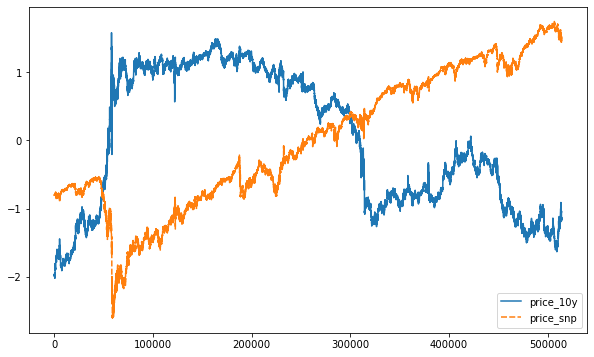

In [16]:
create_lineplot(df)

It is hard to visually tell a "shift" in data which could represent lag dependency. However, perhaps if we shift price_10y far enough to the left, it could work. We will check it later.

### Hypothesis 1А. 10Y explains S&P

**Main idea**: we will be shifting one time series (in this case S&P) relative to another "back in time" and calculate correlation between them for each step. We iterate this process several times and then look for the highest correlations and their corresponding shift. Then we will plot shifted series to visually assess the results.

In [17]:
def find_corrs(df, iterations, multiplier, drop1, drop2):
    result = dict()
    for i in range(1, iterations+1):
        x = df.copy()
        x.drop(columns=[drop1], inplace=True)
        y = df.copy()
        y.drop(columns=[drop2], inplace=True)
        y['Timestamp'] -= pd.Timedelta(i * multiplier, 'min')
        m = pd.merge(left=x, right=y, on='Timestamp', how='inner')
        result[i] = m[[drop1, drop2]].corr().iloc[0, 1]

    corrs = pd.DataFrame.from_dict(data=result, orient='index').reset_index()
    corrs.columns = ['shift', 'corr']
    corrs.sort_values(by='corr', ascending=False, inplace=True)
    return corrs

Find correlation for the initial data (baseline).

In [18]:
df[['price_10y', 'price_snp']].corr().iloc[0, 1]

-0.619909646868493

There is a relatively strong correlation even between initial datasets.

What is the distance between two furthermost time points?

In [19]:
df['Timestamp'].max() - df['Timestamp'].min()

Timedelta('699 days 05:45:00')

1440 minutes in one day

Begin search for correlations.

In [20]:
# let's take a shift with 1 day step (1440 minutes), 650 days total (iterations)
# shift snp 

corrs = find_corrs(df, iterations=650, multiplier=1440, drop1='price_snp', drop2='price_10y')
corrs

,shift,corr
603,604,0.870656
487,488,0.861549
481,482,0.857496
604,605,0.856974
483,484,0.856483
...,...,...
4,5,-0.593182
3,4,-0.598785
0,1,-0.612961
2,3,-0.613262


Strong positive correlation is observed for 604 days shift and 488 days.  
Plot a chart for snp with 604 days shift.

In [21]:
def shift_plot(df, shift, left, right, switch=False):
    y = df.copy()
    y.drop(columns=[left], inplace=True)
    y['Timestamp'] -= pd.Timedelta(shift*1440, 'min')
    x = df.copy()
    x.drop(columns=[right], inplace=True)
    if switch is False:
        m = pd.merge(left=y, right=x, on='Timestamp', how='inner')
    else:
        m = pd.merge(left=x, right=y, on='Timestamp', how='inner')
    create_lineplot(m)

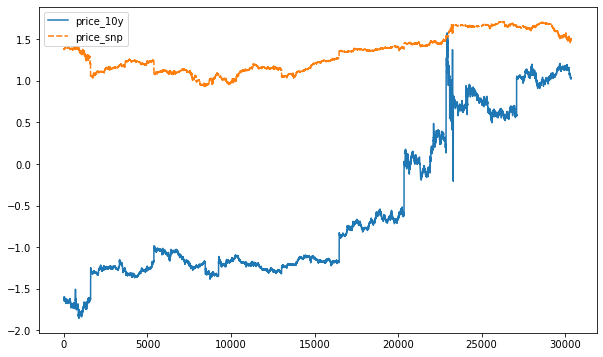

In [22]:
shift_plot(df, 604, 'price_10y', 'price_snp', switch=True)

The shift is too big. Apparently, this is a boundary effect when there is not much data left after the shift.

Let's try 488 days now.

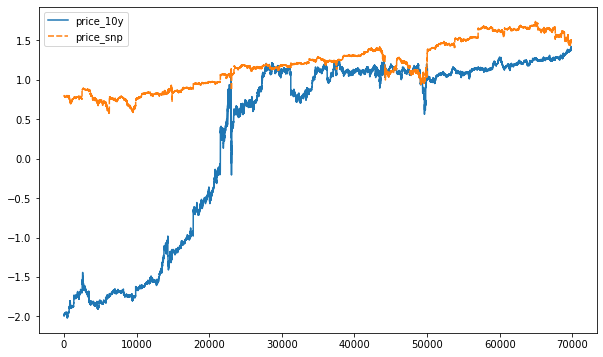

In [23]:
shift_plot(df, 488, 'price_10y', 'price_snp', switch=True)

Looks unconvincing too. I cannot tell a presence of an obvious leader here.

Perhaps there might be other correlations that we have missed.  
Let's plot a chart of correlations against the shift value.

In [24]:
def create_corrplot(corrs):
    fig = plt.figure()
    fig.set_size_inches(10,6)
    sns.lineplot(data=corrs, x='shift', y='corr')
    plt.show()

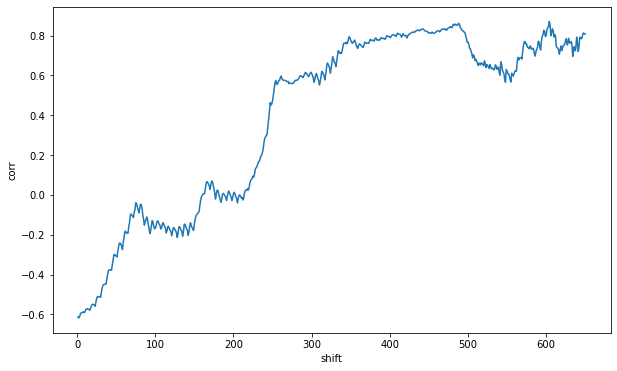

In [25]:
create_corrplot(corrs)

We can see a plateau (relatively constant correlation) between 360 and 500 days of shift.  
Just in case let's check what would happen if we take a one year shift (365 days).

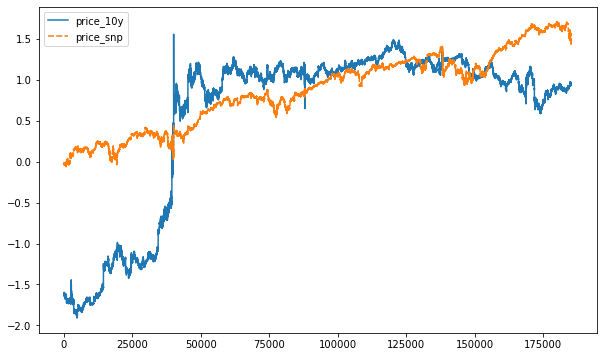

In [26]:
shift_plot(df, 365, 'price_10y', 'price_snp', switch=True)

Despite a high correlation, visually it does not look convincingly.

Once again let's check what happens if we increase the frequency of shift, for example if take a half-a-day step.

In [27]:
# now we take a half-a-day shift (720 minutes), 650*2=1300 iterations
# shift price_snp

corrs = find_corrs(df, iterations=1300, multiplier=720, drop1='price_snp', drop2='price_10y')
corrs

,shift,corr
1207,1208,0.870656
1208,1209,0.870057
975,976,0.861549
976,977,0.858775
963,964,0.857496
...,...,...
5,6,-0.613262
0,1,-0.613867
2,3,-0.614160
4,5,-0.616534


I could not notice any significant difference.

**Conclusion**: hypothesis that 10Y explains S&P has not gained enough support.

### Hypothesis 1B. S&P explains 10Y

Now we swap S&P with 10Y and start shifting 10Y back. 

In [28]:
# swap snp and 10y - now we shift 10y instead of snp
# 650 iterations 1 day step each

corrs = find_corrs(df, iterations=650, multiplier=1440, drop1='price_10y', drop2='price_snp')
corrs

,shift,corr
576,577,0.873924
571,572,0.872097
577,578,0.870186
573,574,0.866360
572,573,0.864840
...,...,...
86,87,-0.900512
101,102,-0.900522
77,78,-0.900968
79,80,-0.902055


We can see two phenomena:
1. Very strong positive correlation when we shift price_10y 79 days back 
1. Very strong positive correlation when we shift price_10y 577 days back

In [1]:
# plot a chart for negative correlation with 79 days shift 

shift_plot(df, shift=79, left='price_snp', right='price_10y')

NameError: name 'shift_plot' is not defined

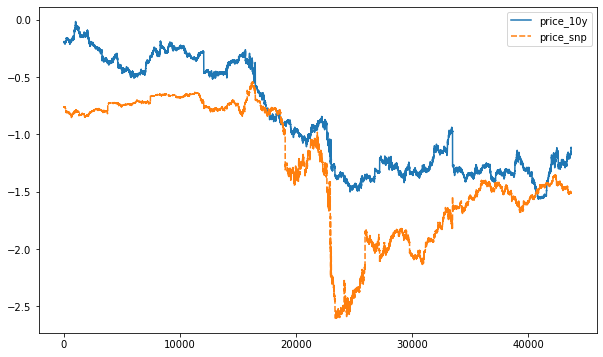

In [30]:
# now for positive correlation with 577 days shift 

shift_plot(df, shift=577, left='price_snp', right='price_10y')

Looks very good. 

Make a scatterplot for this case too. 

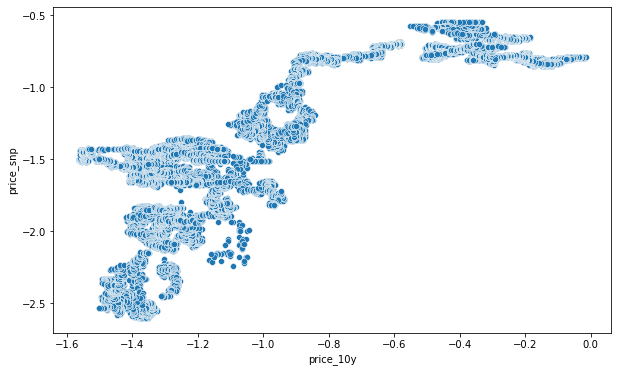

In [31]:
shift = 577 # shift in days
y = df.copy()
y.drop(columns=['price_snp'], inplace=True)
y['Timestamp'] -= pd.Timedelta(shift*1440, 'min')
x = df.copy()
x.drop(columns=['price_10y'], inplace=True)
m = pd.merge(left=y, right=x, on='Timestamp', how='inner')

fig = plt.figure()
fig.set_size_inches(10,6)
sns.scatterplot(data=m, x='price_10y', y='price_snp')
plt.show()

Even though the relationship is not exactly linear, it can be clearly seen.

Now for 79 days shift.

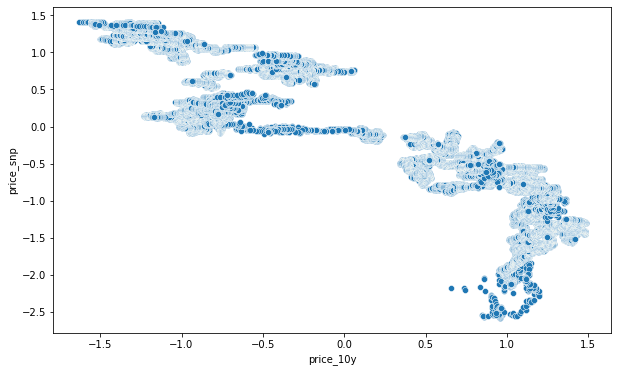

In [32]:
shift = 79 # shift in days
y = df.copy()
y.drop(columns=['price_snp'], inplace=True)
y['Timestamp'] -= pd.Timedelta(shift*1440, 'min')
x = df.copy()
x.drop(columns=['price_10y'], inplace=True)
m = pd.merge(left=y, right=x, on='Timestamp', how='inner')

fig = plt.figure()
fig.set_size_inches(10,6)
sns.scatterplot(data=m, x='price_10y', y='price_snp')
plt.show()

Here the relationship is probably more sophisticated, although the decreasing trend can be seen too. 

Now let's take a look at correlation vs shift plot.

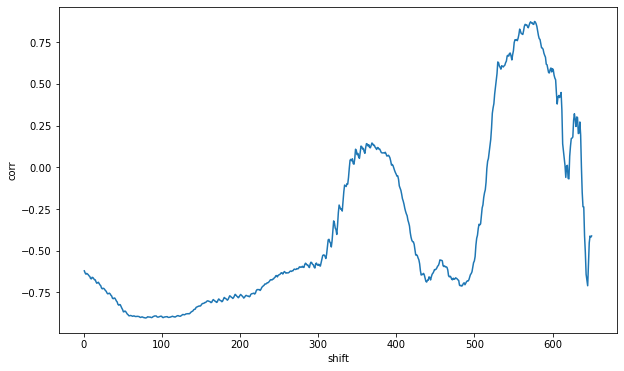

In [33]:
create_corrplot(corrs)

Two key segments can be seen: from 60 to 150 days approximately with negative correlation (also another short segment of negative correlation between 450 and 500 days) and 530 to 600 days with positive correlation.

Let's also see what would happen if we superimpose two steep "drops" in original chart of price_10y vs price_snp.

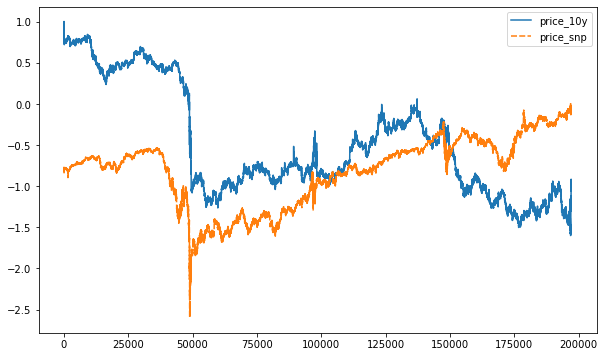

In [34]:
shift = 350 # shift in days
y = df.copy()
y.drop(columns=['price_snp'], inplace=True)
y['Timestamp'] -= pd.Timedelta(shift*1440, 'min')
x = df.copy()
x.drop(columns=['price_10y'], inplace=True)
m = pd.merge(left=y, right=x, on='Timestamp', how='inner')
create_lineplot(m)

In [35]:
corrs.loc[349, 'corr']

0.07585347985850487

Even though visually charts look good, the correlation between them is almost zero.  
Perhaps here we either need to work with the original data (apply smoothing, for example) or use other estimates. 

**Conclusion**: there is evidence that S&P is a leader relative to 10Y.

### Intermediate results

Analysis of correlations has given the following results:
* S&P is a leader in relation to 10Y with a negative correlation (-0.90) for a 78 days lag and a positive correlation (0.87) for a 577 days lag. 

## Second pair: 10 YEAR TREASURY NOTES VS FTSE CHINA

### Data preparation

Now let's take a different pair of futures: 
* 10 YEAR TREASURY NOTES
* FTSE CHINA

In [36]:
df = pd.merge(left=df1, right=df3, on='Timestamp', how='inner')
df.drop(columns=['Ticker Full Name_x', 'Ticker Full Name_y'], inplace=True)
df.rename(columns={'Close Candle_x':'price_10y', 'Close Candle_y':'price_ftse'}, inplace=True)
df

,Timestamp,price_10y,price_ftse
0,2020-01-01 20:01:00,128.296,14497.5
1,2020-01-01 20:02:00,128.296,14512.5
2,2020-01-01 20:03:00,128.296,14515.0
3,2020-01-01 20:04:00,128.296,14510.0
4,2020-01-01 20:05:00,128.296,14512.5
...,...,...,...
431063,2021-11-30 23:11:00,131.171,15388.0
431064,2021-11-30 23:18:00,131.171,15385.0
431065,2021-11-30 23:35:00,131.203,15395.0
431066,2021-11-30 23:42:00,131.171,15402.0


In [37]:
df.iloc[:, 1:] = StandardScaler().fit_transform(df.iloc[:, 1:])
df

,Timestamp,price_10y,price_ftse
0,2020-01-01 20:01:00,-1.992771,-0.680408
1,2020-01-01 20:02:00,-1.992771,-0.671974
2,2020-01-01 20:03:00,-1.992771,-0.670568
3,2020-01-01 20:04:00,-1.992771,-0.673379
4,2020-01-01 20:05:00,-1.992771,-0.671974
...,...,...,...
431063,2021-11-30 23:11:00,-1.164314,-0.179679
431064,2021-11-30 23:18:00,-1.164314,-0.181366
431065,2021-11-30 23:35:00,-1.155093,-0.175743
431066,2021-11-30 23:42:00,-1.164314,-0.171807


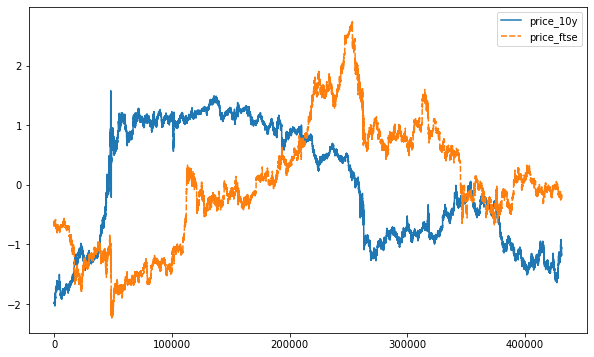

In [38]:
create_lineplot(df)

I cannot see a good shift immediately.

Check the initial correlation

In [39]:
df[['price_10y', 'price_ftse']].corr().iloc[0, 1]

-0.11975177770306968

What is the difference between two furthermost dates?

In [40]:
df['Timestamp'].max() - df['Timestamp'].min()

Timedelta('699 days 03:45:00')

### Hypothesis 2А. 10Y explains FTSE

In [41]:
# one day shift (1440 minutes), 650 days total (iterations)
# shift ftse 

corrs = find_corrs(df, iterations=650, multiplier=1440, drop1='price_ftse', drop2='price_10y')
corrs

,shift,corr
159,160,0.690596
158,159,0.688281
170,171,0.686408
152,153,0.685121
156,157,0.684924
...,...,...
498,499,-0.927788
496,497,-0.927860
502,503,-0.930078
497,498,-0.932588


Let's make a chart for positive correlation with 160 days FTSE shift

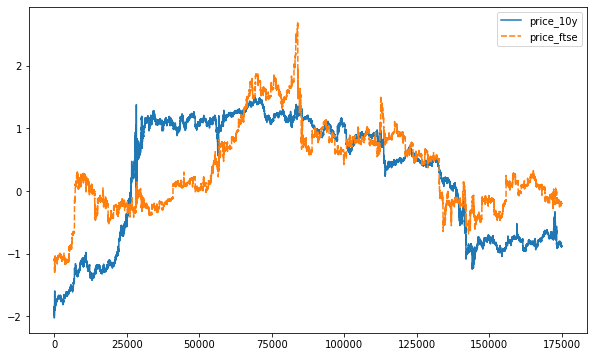

In [42]:
shift_plot(df, 160, 'price_10y', 'price_ftse', switch=True)

It is hard to say whether the lines coincide well enough but overall I believe this chart supports the hypothesis rather than contradicts it. 

Now let's take a look at negative correlation. 

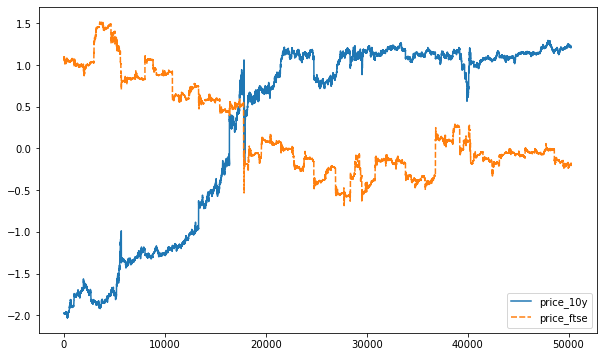

In [43]:
shift_plot(df, 502, 'price_10y', 'price_ftse', switch=True)

Indeed it looks like the two lines are "mirroring" each other. 

Make a correlation vs shift plot.

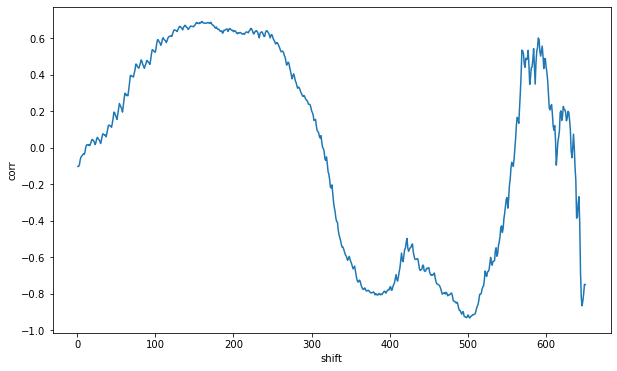

In [44]:
create_corrplot(corrs)

Plateau between 160 and 250 days with a positive correlation looks like a good choice since it might also represent a 6-month cycle. 

**Conclusion**: there is evidence that 10Y is leader relative to FTSE. 

### Hypothesis 2B. FTSE explains 10Y

In [45]:
# one day shift (1440 minutes), 650 days total (iterations)
# shift 10y 

corrs = find_corrs(df, iterations=650, multiplier=1440, drop1='price_10y', drop2='price_ftse')
corrs

,shift,corr
583,584,0.813713
579,580,0.803026
580,581,0.799659
582,583,0.798313
587,588,0.794671
...,...,...
126,127,-0.856375
135,136,-0.856733
129,130,-0.858876
127,128,-0.859820


Make a chart for positive correlation with 584 days 10Y shift.

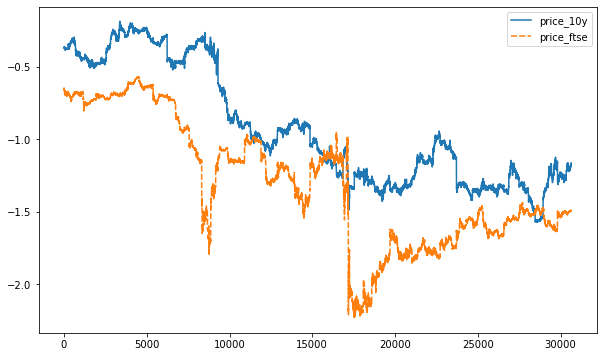

In [46]:
shift_plot(df, 584, 'price_ftse', 'price_10y')

Looks good but this is almost a boundary effect - 584 days shift out of 699 possible.  
I have strong doubts about reliability of any conclusions here.

Now let's take a look at a negative correlation. 

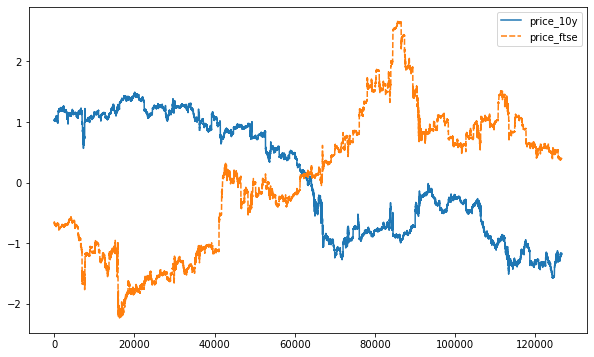

In [47]:
shift_plot(df, 129, 'price_ftse', 'price_10y')

A good negative relationship, 4 months interval also sounds convincingly.

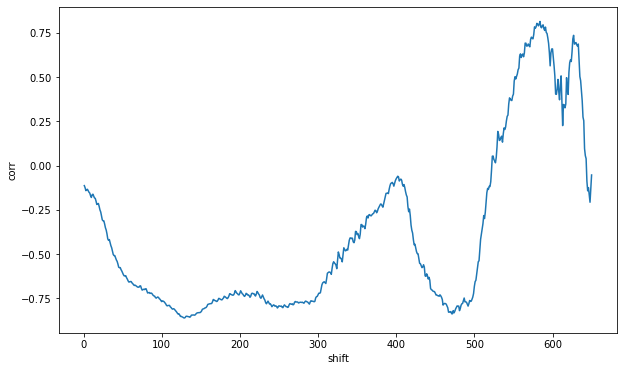

In [48]:
create_corrplot(corrs)

We can see a relatively large plateau with negative correlation for 120 to 300 days lag (also a small segment near 500 days) and a hike with positive correlation at around 570-590 days. 

**Conclusion**: there is evidence that FTSE is a leader relative to 10Y.

### Intermediate results

Analysis of correlations has yielded the following results:
* 10Y is a leader for FTSE with a positive correlation (0.69) for 160 days lag and a negative correlation (-0.93) for 502 days lag.
* FTSE is a leader for 10Y with a positive correlation (0.81) for 584 days lag and a negative correlation (-0.86) for 129 days lag.

This result seems to be contradictory. For example, 10Y explains FTSE with a positive relationship at 160 days lag, and at the same time FTSE explains 10Y with a negative relationship at 129 days lag. It means that the relationship depends on which index (futures) we consider first, which intuitively should not be so. The same holds for 502-584 days lag.

For reasons above I believe there is no clear lag relationship between these two futures.

*Note: if we had observed a similar behavior but for relatively far apart time spans, we could have assumed that we witnessed alternating leader-follower relationship.*

## Third pair: E-MINI S&P 500 VS FTSE CHINA

### Data preparation

Now take the last pair of futures:
* S&P 500
* FTSE CHINA

In [49]:
df = pd.merge(left=df2, right=df3, on='Timestamp', how='inner')
df.drop(columns=['Ticker Full Name_x', 'Ticker Full Name_y'], inplace=True)
df.rename(columns={'Close Candle_x':'price_snp', 'Close Candle_y':'price_ftse'}, inplace=True)
df

,Timestamp,price_snp,price_ftse
0,2020-01-01 20:01:00,3239.75,14497.5
1,2020-01-01 20:02:00,3239.50,14512.5
2,2020-01-01 20:03:00,3239.75,14515.0
3,2020-01-01 20:04:00,3240.00,14510.0
4,2020-01-01 20:05:00,3240.00,14512.5
...,...,...,...
556499,2021-11-30 23:55:00,4605.75,15390.0
556500,2021-11-30 23:56:00,4606.75,15390.0
556501,2021-11-30 23:57:00,4606.50,15388.0
556502,2021-11-30 23:58:00,4606.50,15390.0


In [50]:
df.iloc[:, 1:] = StandardScaler().fit_transform(df.iloc[:, 1:])
df

,Timestamp,price_snp,price_ftse
0,2020-01-01 20:01:00,-0.794195,-0.692374
1,2020-01-01 20:02:00,-0.794622,-0.683875
2,2020-01-01 20:03:00,-0.794195,-0.682459
3,2020-01-01 20:04:00,-0.793768,-0.685291
4,2020-01-01 20:05:00,-0.793768,-0.683875
...,...,...,...
556499,2021-11-30 23:55:00,1.539316,-0.186694
556500,2021-11-30 23:56:00,1.541025,-0.186694
556501,2021-11-30 23:57:00,1.540597,-0.187827
556502,2021-11-30 23:58:00,1.540597,-0.186694


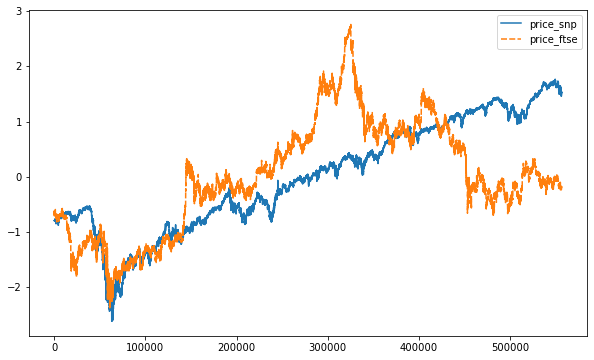

In [51]:
create_lineplot(df)

An immediate and very beatiful positive relationship!

Check the initial correlation

In [52]:
df[['price_snp', 'price_ftse']].corr().iloc[0, 1]

0.5869848182141724

What is the distance between two furthermost dates?

In [53]:
df['Timestamp'].max() - df['Timestamp'].min()

Timedelta('699 days 03:58:00')

### Hypothesis 3А. S&P explains FTSE

In [54]:
# a one day shift (1440 minutes), 650 days total (iterations)
# shift ftse 

corrs = find_corrs(df, iterations=650, multiplier=1440, drop1='price_ftse', drop2='price_snp')
corrs

,shift,corr
513,514,0.713160
514,515,0.708791
506,507,0.701776
517,518,0.695873
512,513,0.694416
...,...,...
313,314,-0.785131
312,313,-0.785472
302,303,-0.785594
310,311,-0.785625


Let's take a look at a chart for a positive correlation with 514 days FTSE shift.

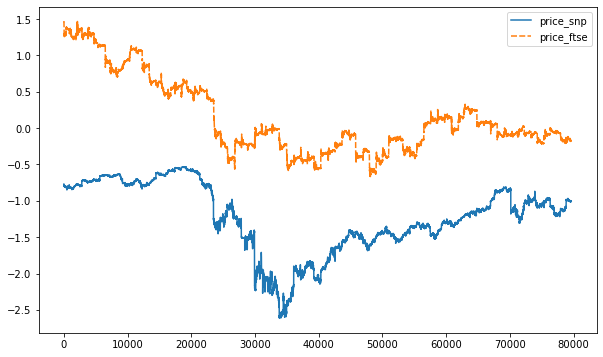

In [55]:
shift_plot(df, 514, 'price_snp', 'price_ftse', switch=True)

Looks very good.

Now let's take a look at a negative correlation with 310 days shift.

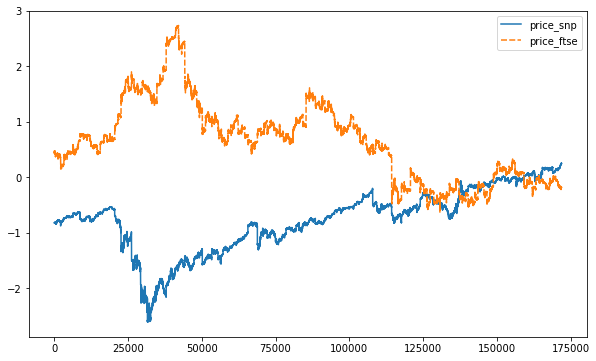

In [56]:
shift_plot(df, 310, 'price_snp', 'price_ftse', switch=True)

A negative correlation can be observed.

Now a correlation vs lag plot.

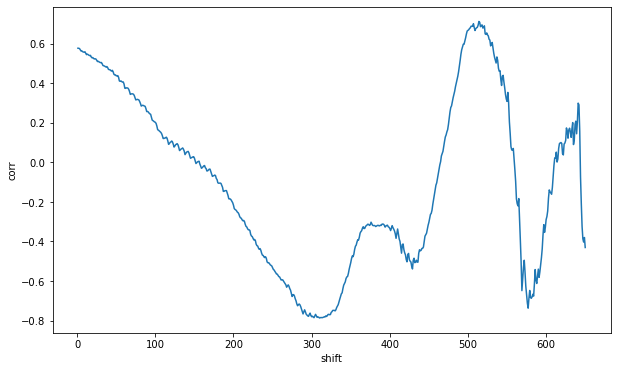

In [57]:
create_corrplot(corrs)

Interestingly a negative correlation can be seen at 300 days and 600 days lag. This might be suggesting a cyclical nature of the relationship. 

**Conclusion**: there is evidence that S&P is a leader relative to FTSE.

### Hypothesis 3B. FTSE explains S&P

In [58]:
# a one day shift (1440 minutes), 650 days total (iterations)
# shift S&P 

corrs = find_corrs(df, iterations=650, multiplier=1440, drop1='price_snp', drop2='price_ftse')
corrs

,shift,corr
176,177,0.899544
175,176,0.898297
177,178,0.897953
180,181,0.896745
181,182,0.896614
...,...,...
643,644,-0.772485
646,647,-0.777268
649,650,-0.800843
648,649,-0.810935


Let's take a look at a chart for a positive correlation with 177 days S&P shift. 

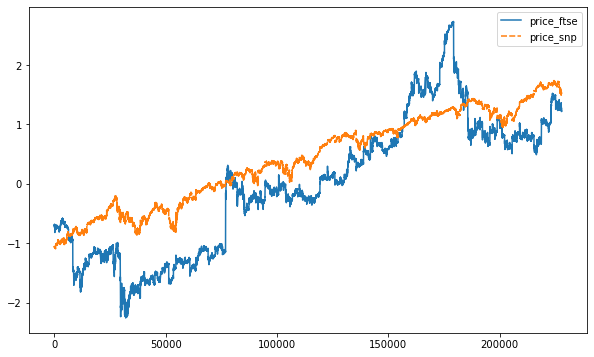

In [59]:
shift_plot(df, 177, 'price_ftse', 'price_snp', switch=True)

It is hard to tell visually that the two lines coincide well, however a certain trend can be seen. 

Now a negative correlation.

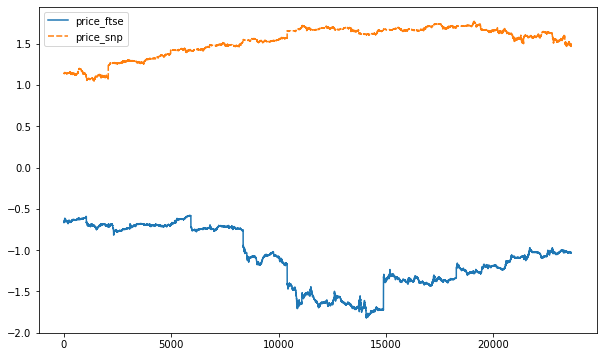

In [60]:
shift_plot(df, 648, 'price_ftse', 'price_snp', switch=True)

This is obviously a boundary case - there are only 50 observations left in the sample.

Now a correlation vs shift plot. 

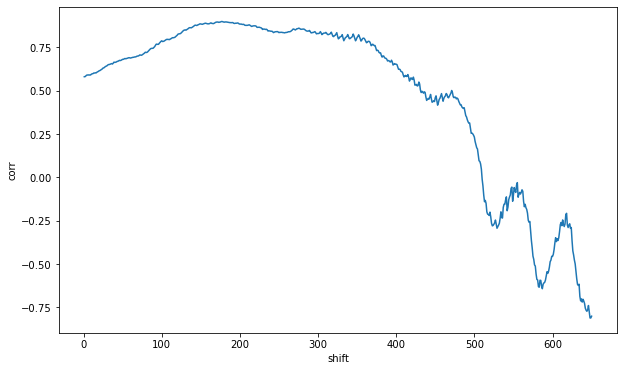

In [61]:
create_corrplot(corrs)

We can see a very big positive positive correlation plateau. FTSE is steadily and positively correlated with S&P on almost whole 1 year lag. 

*Note: we could also assume here that these two futures move in the same direction not because one is affecting another but because their movement is determined by some other third factor. To check for this effect we would have to go into the details of these futures and require additional data which is beyond this small research.*

**Conclusion**: there is evidence that FTSE is a leader for S&P.

### Intermediate results

Analysis of correlations has yielded the following results: 
* S&P is a leader for FTSE with a positive correlation (0.71) for 514 days lag and a negative correlation (-0.78) for 310 days lag.
* FTSE is a leader for S&P with a positive correlation (0.89) for 177 days lag.

I have an impression that S&P and FTSE have an alternating leader-follower relationship. In a short-term timeframe FTSE is a leader, in a mid- and long-term timeframe S&P becomes the leader. The direction of relationship also changes: below 6 months it is positive, then it changes to negative, then near 1.5 years it becomes positive again. Also, these lags are roughly multiples of 6 months: 177 days, 310 days and 514 days.

# Conclusion

Analysis of lag relationships between three futures pairs has yielded the following results:
* S&P is a leader relative to 10Y with a negative relationship for 2-3 months lag and with a positive relationship for 1.5 years lag
* 10Y and FTSE seemingly do not have any lag relationship
* S&P and FTSE have an alternating leader-follower relationship: FTSE is a leader for S&P with a positive relationship for a 6 months (and less) lag, S&P is a leader for FTSE with a negative relationship for a 6-12 months lag and a positive relationship with a 1.5 years lag. 

**Some follow-up thoughts**

* Direction of relationship

An import question that remains is what theory can say about a direction of relationship between these kinds of futures. 

In particular, a negative relationship might indicate that these futures are substitutes. In other words, if a price for one futures rises (which signals increasing demand for this futures) and consequetively the price for a second futures drops (which indicates decreasing demand for that futures), then consumers substitute one futures for another. For example, consumers do not care about any specific futures, they only care about their value and so are ready to buy/sell them when an opportunity arises. Such futures might be good candidates for risk hedging.

On the other hand, a positive relationship indicates potential for a complementarity between the two futures since increasing demand for one futures also stimulates demand for another. For example, this might happen when these futures are connected through some other third factor, e.g. deep trade relationship between two countries, that affects both. Investing in such futures could be a high risk/high reward strategy.

Deeper insight into the theory and international experience could significantly enrich this research.

* Pandemic effects

The time series used in this research are spanning the period from 2020 to the second half of 2021 which was the peak period for COVID-19 pandemic. It is possible therefore that some of the observed phenomena are caused by the pandemic. Considering its global presence I believe that these potential effects should have a similar impact on all three futures and so should not drastically affect research results. However, this assumption ideally should be verified separately. 

* Correlations range

To make this analysis' results more valuable one could use not only point estimates of a correlation coefficient for a particular time lag but also correlations "around" these points. These could yield some kind of "probability distribution" of futures prices similar to confidence intervals used in statistical analysis that could serve as a more accurate description of the results.